In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.float=float
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
data=pd.read_csv('D:/dip(AIML(cse))/kaggle/heart.csv')
df=pd.DataFrame(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,NaN,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264.0,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193.0,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131.0,0,1,115,1,1.2,1,1,3,0


In [86]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        5
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [87]:
mean=df['chol'].mean()
df['chol']=df['chol'].fillna(mean)

<Axes: >

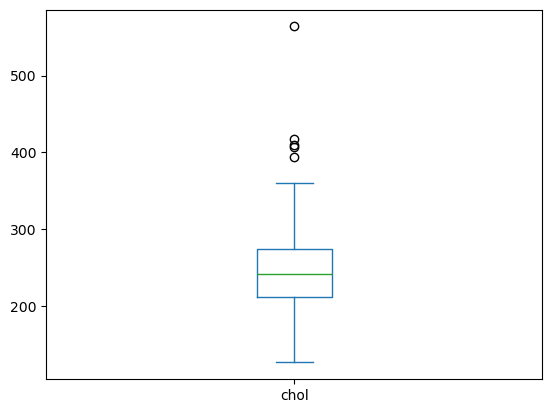

In [88]:
df['chol'].plot(kind='box')

<Axes: >

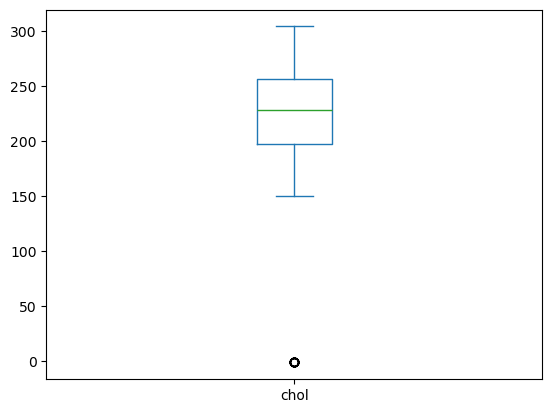

In [89]:
q1=df['chol'].quantile(0.25)
q3=df['chol'].quantile(0.75)
iqr=q3-q1
lower_bound=q3-(1.5*iqr)
upper_bound=q1+(1.5*iqr)
arr_age=df['chol']
lower_cap = -1
upper_cap = 150
for i in df['chol']:
    if i<lower_bound:
        df['chol']=df['chol'].replace(i,lower_cap)
    elif i>upper_bound:
        df['chol']=df['chol'].replace(i,upper_cap)
df['chol'].plot(kind='box')

<Axes: xlabel='thal'>

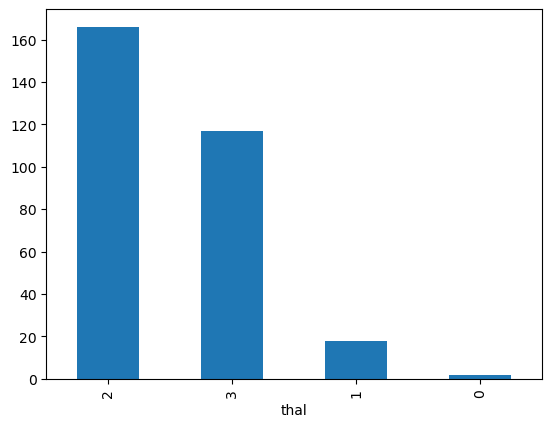

In [90]:
c=df['thal'].value_counts()
c.plot(kind='bar')

<Axes: xlabel='cp'>

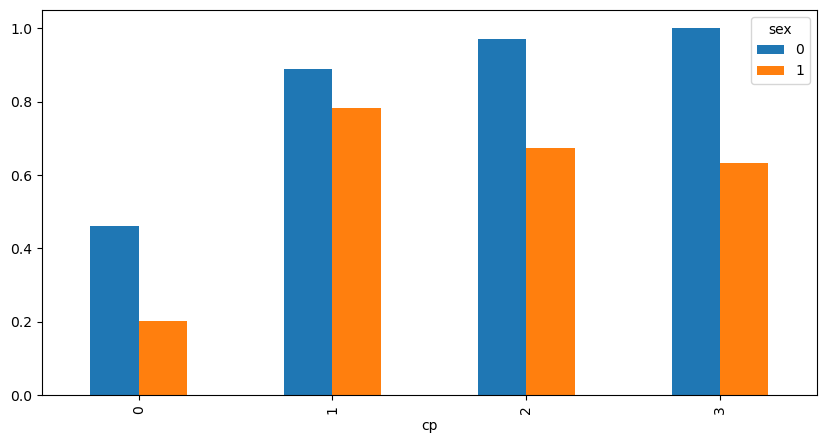

In [91]:
df.groupby(['cp','sex'])['target'].mean().unstack().plot(kind='bar', figsize=(10,5))

In [92]:
x = df.drop("target", axis=1)
y = df["target"] 

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [94]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
272,67,1,0,120,237.0,0,1,71,0,1.0,1,0,2
217,63,1,0,130,150.0,1,0,132,1,1.8,2,3,3
18,43,1,0,150,247.0,0,1,171,0,1.5,2,0,2
81,45,1,1,128,150.0,0,0,170,0,0.0,2,0,2
161,55,0,1,132,150.0,0,1,166,0,1.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,51,0,2,140,150.0,0,0,142,0,1.5,2,1,2
75,55,0,1,135,250.0,0,0,161,0,1.4,1,0,2
87,46,1,1,101,197.0,1,1,156,0,0.0,2,0,3
63,41,1,1,135,203.0,0,1,132,0,0.0,1,0,1


In [95]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
221,55,1,0,140,217.0,0,1,111,1,5.6,0,0,3
8,52,1,2,172,199.0,1,1,162,0,0.5,2,0,3
89,58,0,0,100,248.0,0,0,122,0,1.0,1,0,2
154,39,0,2,138,220.0,0,1,152,0,0.0,1,0,2
201,60,1,0,125,258.0,0,0,141,1,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,58,1,0,100,234.0,0,1,156,0,0.1,2,1,3
69,62,0,0,124,209.0,0,1,163,0,0.0,2,0,2
276,58,1,0,146,218.0,0,1,105,0,2.0,1,1,3
147,60,0,3,150,240.0,0,1,171,0,0.9,2,0,2


In [96]:
y_train

272    0
217    0
18     1
81     1
161    1
      ..
40     1
75     1
87     1
63     1
11     1
Name: target, Length: 227, dtype: int64

In [97]:
y_test

221    0
8      1
89     1
154    1
201    0
      ..
273    0
69     1
276    0
147    1
165    0
Name: target, Length: 76, dtype: int64

In [98]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((227, 13), (76, 13), (227,), (76,))

## LogisticRegression:

In [99]:
model = LogisticRegression()  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [101]:
acc=model.score(x_test,y_test)
print(acc)

0.8421052631578947


## Decision Tree:

In [103]:
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

# Predictions
y_pred = model1.predict(x_test)

In [104]:
acc1=model1.score(x_test,y_test)
print(acc1)

0.8157894736842105


## K Nearest Neighbors:

In [105]:
model2 = KNeighborsClassifier() 
model2.fit(x_train, y_train)
# Predictions
y_pred = knn.predict(x_test)

In [106]:
acc2=model2.score(x_test,y_test)
print(acc2)

0.6973684210526315


## Random Forest:

In [118]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

In [108]:
acc3=model3.score(x_test,y_test)
print(acc3)

0.5256399168399168
